<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1605139200&v=beta&t=opmJLG_veDflQesF9uJvIhSXbmwPY3DGSlbZo1v-w2k" width="1000"></center>

### Información del Caso

La extracción fue realizada por Barry Becker de la base de datos del Censo de 1994. Se extrajo un conjunto de registros razonablemente limpios utilizando las siguientes condiciones: ((AAGE> 16) && (AGI> 100) && (AFNLWGT> 1) && (HRSWK> 0))

La tarea de predicción es determinar si una persona gana más de 50 mil al año.

### Informacion de los atributos:

**age(edad):** continuous.

**workclass(clase de trabajo):** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt:** continuous.:Son los pesos en los archivos de CPS se controlan según estimaciones independientes de la población civil no institucional de los EE. UU, se refiere a los totales de población derivados de CPS mediante la creación de "recuentos ponderados" 

**education(educación):** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num:** continuous.

**marital-status(estado civil):** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation(ocupación):** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship(relación):** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race(raza):** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex(genero):** Female, Male.

**capital-gain(ganancia de capital):** continuous.

**capital-loss(perdida de capital):** continuous.

**hours-per-week(horas por semana):** continuous.

**native-country(país de origen):** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**Y(Variable predictora):**  >50K, <=50K

In [2]:
import numpy as np
import pandas as pd

data= "D:/SOCIAL DATA/Dropbox/Python 4ta edición - Programa Completo/2. intermedio/sesión_5/datos/adult.data"
df_gain=pd.read_csv(data,delimiter=",",names=['age','workclass','fnlwgt','education'
                                                            ,'education-num','marital-status','occupation','relationship'
                                                            ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Y'])
df_gain.info()
df_gain.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Y               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
from collections import defaultdict
from sklearn import preprocessing 
#Defino el diccionario con la funcion LabelEncoder(que se usa para convertir los object en numerico
d = defaultdict(preprocessing.LabelEncoder)
type(d)

collections.defaultdict

In [4]:
# Agrupando columnas por tipo de datos
tipos = df_gain.columns.to_series().groupby(df_gain.dtypes).groups
tipos

{dtype('int64'): Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'),
 dtype('O'): Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'native-country', 'Y'],
       dtype='object')}

In [5]:
#Generar la lista de solo los nombres de las columna de tipo object
list_text=list(tipos[np.dtype('object')])
list_text

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Y']

In [6]:
#lambda x: d[x.name].fit_transform(x) if x.name in list_text else x
#Solo se aplica d[x.name].fit_transform(x) la transformacion 
#si el nombre se encuentra en la lista(if x.name in list_text)
#de lo contrario no se realiza ninguna transformacion(x)
# Codificar las variables
fit=df_gain.apply(lambda x: d[x.name].fit_transform(x) if x.name in list_text else x)
# Invertir el codificado(Necesario para entrenar al fit si quieres invertir el cambio
fit.apply(lambda x: d[x.name].inverse_transform(x) if x.name in list_text else x)
# Usando el diccionario para etiquetar datos futuros
df_gain=df_gain.apply(lambda x: d[x.name].transform(x) if x.name in list_text else x)
df_gain.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [13]:
#Como obtener cada clase de la variable "workclass"
workclass=list(d['education'].classes_)
workclass

[' 10th',
 ' 11th',
 ' 12th',
 ' 1st-4th',
 ' 5th-6th',
 ' 7th-8th',
 ' 9th',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' Bachelors',
 ' Doctorate',
 ' HS-grad',
 ' Masters',
 ' Preschool',
 ' Prof-school',
 ' Some-college']

In [20]:
workclass2=list(d["education"].transform(workclass))
workclass2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
z= zip(workclass,workclass2)

In [23]:
list(z)

[(' 10th', 0),
 (' 11th', 1),
 (' 12th', 2),
 (' 1st-4th', 3),
 (' 5th-6th', 4),
 (' 7th-8th', 5),
 (' 9th', 6),
 (' Assoc-acdm', 7),
 (' Assoc-voc', 8),
 (' Bachelors', 9),
 (' Doctorate', 10),
 (' HS-grad', 11),
 (' Masters', 12),
 (' Preschool', 13),
 (' Prof-school', 14),
 (' Some-college', 15)]

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis#, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report#confusion_matrix, , precision_score

In [26]:
from sklearn.model_selection import train_test_split

X, y = df_gain.iloc[:, df_gain.columns != 'Y'].values, df_gain.iloc[:, -1].values
# df_gain.columns != 'Y',se usa todas las variables menos la variable predictora "Y"
# df_gain.iloc[:, -1] ,se usa la ultima columna,que es la variable predictora "Y"
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, # porcentaje de 30% para testeo
                     random_state=0, 
                     stratify=y)

In [27]:
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, 
                y_train)

print(model.priors_)

[0.75916988 0.24083012]


In [28]:
print(model.means_)

[[3.68036757e+01 3.81829741e+00 1.90345804e+05 1.01125816e+01
  9.58463850e+00 2.77807317e+00 6.35855054e+00 1.67941975e+00
  3.62873490e+00 6.12726117e-01 1.51515171e+02 5.25210079e+01
  3.87584812e+01 3.66345720e+01]
 [4.42410275e+01 4.00182183e+00 1.88037009e+05 1.08056112e+01
  1.16154126e+01 2.07888504e+00 7.11222445e+00 7.37474950e-01
  3.76243396e+00 8.48788486e-01 4.07023738e+03 1.86139734e+02
  4.53547094e+01 3.68139916e+01]]


In [29]:
print(model.coef_)

[[ 3.47829242e-02 -2.24058783e-02  5.09088780e-07 -3.03405567e-02
   3.52392099e-01 -1.73692316e-01  1.65622104e-02 -1.14434525e-01
   9.77972890e-02  7.42819183e-01  6.74844930e-05  8.14196131e-04
   2.69140448e-02 -1.09919596e-03]]


In [30]:
pred=model.predict(X_test)
print(np.unique(pred, return_counts=True))

(array([0, 1]), array([8384, 1385], dtype=int64))


In [31]:
type(pred)

numpy.ndarray

In [20]:
type(y_test)

numpy.ndarray

In [32]:
print(classification_report(y_test, pred, digits=2))
#El 0 seria 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7417
           1       0.69      0.41      0.51      2352

    accuracy                           0.81      9769
   macro avg       0.76      0.67      0.70      9769
weighted avg       0.80      0.81      0.79      9769



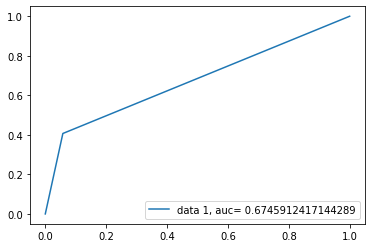

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="data 1, auc= "+str(auc))

plt.legend(loc=4)
plt.show()

### Informacion del caso

El estudio de la clasificación de los tipos de vidrio fue motivado por la investigación criminológica. En la escena del crimen, el vidrio que queda puede usarse como evidencia.

### Información del atributo:

1. Número de identificación: 1 a 214
2. RI: índice de refracción
3. Na: sodio (medida de la unidad: porcentaje en peso en el óxido correspondiente, como
                  son atributos 4-10)
4. Mg: magnesio
5. Al: aluminio
6. Si: silicio
7. K: potasio
8. Ca: calcio
9. Ba: bario
10. Fe: hierro
11. Tipo de vidrio: (atributo de clase)

    **Vidrio de Edificio**
    
       1 (Tipo de Vidrio flotador_procesado)
       
       2 (Tipo de Vidrio no flotador_procesado)
       
    **Vidrio de Vehiculo**
    
       3 (Tipo de Vidrio flotador_procesado)
       
       4 (Tipo de Vidrio no flotador_procesado) (ninguno en esta base de datos)
    
    **No es vidrio**
    
       5 (contenedores)
     
       6 (vajillas)
     
       7 (faros)

### Documentos relevntes:
Ian W. Evett and Ernest J. Spiehler. Rule Induction in Forensic Science. Central Research Establishment. Home Office Forensic Science Service. Aldermaston, Reading, Berkshire RG7 4PN

In [19]:
import numpy as np
import pandas as pd
datos = "D:/SOCIAL DATA/Dropbox/Python 4ta edición - Programa Completo/2. intermedio/sesión_5/datos/glass.data"
df_glass=pd.read_csv(datos,delimiter=",",names=['Nro','Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Y'])
df_glass.info()
df_glass.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
Nro    214 non-null int64
Ri     214 non-null float64
Na     214 non-null float64
Mg     214 non-null float64
Al     214 non-null float64
Si     214 non-null float64
K      214 non-null float64
Ca     214 non-null float64
Ba     214 non-null float64
Fe     214 non-null float64
Y      214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


,Nro,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Y
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Actividades:

    1-Solo considera las columnas 'Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Y' y reserva el testeo en 30%
    
    2-Encontrar los priori
    
    3-Encontrar los coeficientes
    
    4-Reporte de clasificacion con la data de testeo
    
    5-Generar la matriz de confusion